In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
path = "lab-results/SB.txt"
data =  np.loadtxt(path, skiprows=1)
with open(path, "r") as f:
    header = f.readline().strip()
print(header)
print(data)

V[V] Vs[mV] I[A]
[[ 1.    0.2   0.93]
 [ 2.    0.9   1.19]
 [ 3.    2.    1.43]
 [ 4.    3.5   1.64]
 [ 5.    5.3   1.83]
 [ 6.    7.4   2.02]
 [ 7.    9.9   2.18]
 [ 8.   12.6   2.34]
 [ 9.   16.3   2.49]
 [10.   19.3   2.63]
 [11.   23.1   2.77]]


In [123]:
def lerp(x0, y0, x1, y1, x):
    if x1 == x0:
        raise ValueError("x0 and x1 cannot be the same value")
    return y0 + (x - x0) * (y1 - y0) / (x1 - x0)

In [124]:
#table values
table = [
    (1.00, 300),
    (1.43, 400),
    (1.87, 500),
    (2.34, 600),
    (2.85, 700),
    (3.36, 800),
    (3.88, 900),
    (4.41, 1000),
    (4.95, 1100),
    (5.48, 1200),
    (6.03, 1300),
    (6.58, 1400),
    (7.14, 1500),
    (7.71, 1600),
    (8.28, 1700),
    (8.86, 1800),
    (9.44, 1900),
    (10.03, 2000),
    (10.63, 2100),
    (11.24, 2200),
    (11.84, 2300),
    (12.46, 2400),
    (13.08, 2500),
    (13.72, 2600),
    (14.34, 2700),
    (14.99, 2800),
    (15.63, 2900),
    (16.29, 3000),
    (16.95, 3100),
    (17.62, 3200),
    (18.28, 3300),
    (18.97, 3400),
    (19.66, 3500),
    (26.35, 3600)]


In [125]:
def Tlerp(RR0):
    for i in range(len(table)):
        if table[i][0] <= RR0 < table[i+1][0]:
            return lerp(*table[i], *table[i+1], RR0)
vecTlerp = np.vectorize(Tlerp)

In [126]:
V = data[:,0] 
Vs= data[:,1]
I = data[:,2]
R = V/I # Ohm
T0= 25.2 + 273.15
R0= 267e-3 # Ohm
alpha = 4.5*10**-3 # K^-1
RR0 = R/R0
RR0


array([ 4.02722403,  6.29465269,  7.85731123,  9.13492281, 10.23311025,
       11.12470798, 12.02625159, 12.80450719, 13.53729525, 14.24075419,
       14.87310537])

In [127]:
Teq = T0 + (R-R0)/(alpha*R0)
Teq


array([ 971.06645211, 1474.93948723, 1822.19693958, 2106.11062442,
       2350.15227812, 2548.28510587, 2748.62813093, 2921.57381923,
       3084.41561076, 3240.73982008, 3381.26230426])

In [128]:
Ttab = vecTlerp(RR0)
Ttab

array([ 927.77811971, 1348.11867137, 1625.8440751 , 1847.40048447,
       2033.85170859, 2181.09966826, 2330.0405789 , 2455.56567525,
       2571.45238256, 2683.99261135, 2782.01621064])

ønsker Vs prop sigma 

T (begge)

[]

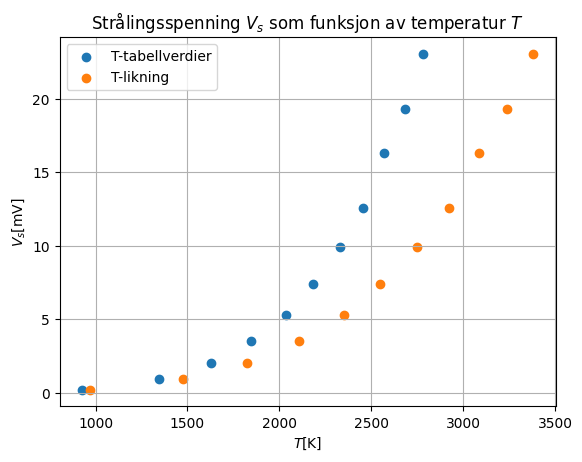

In [ ]:
plt.scatter(Ttab,Vs, label='T-tabellverdier')
plt.scatter(Teq,Vs, label='T-likning')
#plt.scatter(Ttab[4],Vs[4],label='Uteligger')
#plt.legend()
plt.title(r"Sensorspenning $V_s$ som funksjon av temperatur $T$")
plt.ylabel(r"$V_s[\text{mV}]$")
plt.xlabel(r"$T[\text{K}]$")
plt.grid()
plt.legend()
plt.plot()

[]

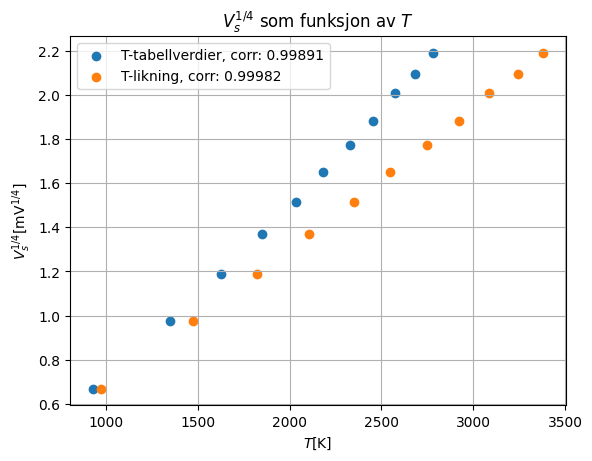

In [130]:
#plt.scatter(Ttab,np.log(Vs))
corrEQ = np.corrcoef(Teq,Vs**(1/4))[0,1]
corrTAB = np.corrcoef(Ttab,Vs**(1/4))[0,1]
plt.scatter(Ttab,Vs**(1/4), label=f'T-tabellverdier, corr: {corrTAB:.5f}')
plt.scatter(Teq,Vs**(1/4), label=f'T-likning, corr: {corrEQ:.5f}')
#plt.scatter(Ttab[4],Vs[4],label='Uteligger')
plt.legend()
plt.title(r"$V_s^{1/4}$ som funksjon av $T$")
plt.ylabel(r"$V_s^{1/4}[\text{mV}^{1/4}]$")
plt.xlabel(r"$T[\text{K}]$")
plt.grid()
#plt.text(x=0,y=0,s=corr)
#plt.figtext(0.15, 0.8, f'corr = {corr:.4f}', fontsize=13)
plt.plot()

T_EQ

[]

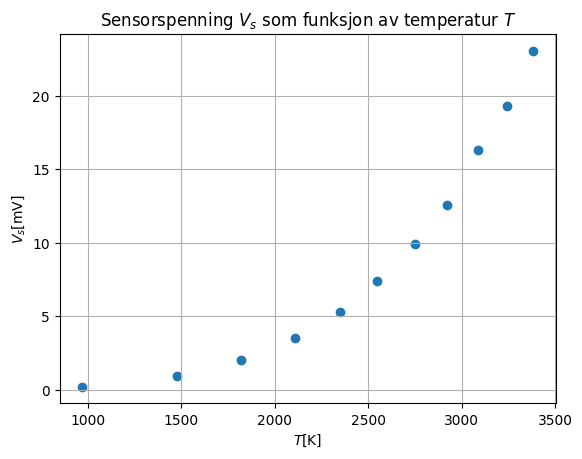

In [140]:
plt.scatter(Teq,Vs)
#plt.scatter(Ttab[4],Vs[4],label='Uteligger')
#plt.legend()
plt.title(r"Sensorspenning $V_s$ som funksjon av temperatur $T$")
plt.ylabel(r"$V_s[\text{mV}]$")
plt.xlabel(r"$T[\text{K}]$")
plt.grid()
plt.plot()

C:\Users\Oliver\AppData\Local\Temp\ipykernel_20076\780616359.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[]

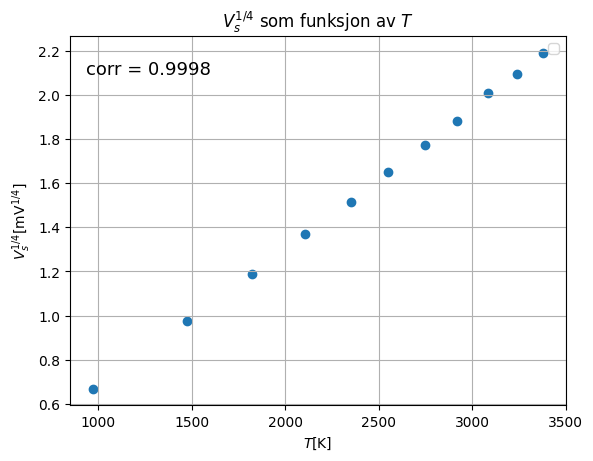

In [132]:
#plt.scatter(Ttab,np.log(Vs))
plt.scatter(Teq,Vs**(1/4))
#plt.scatter(Ttab[4],Vs[4],label='Uteligger')
plt.legend()
plt.title(r"$V_s^{1/4}$ som funksjon av $T$")
plt.ylabel(r"$V_s^{1/4}[\text{mV}^{1/4}]$")
plt.xlabel(r"$T[\text{K}]$")
plt.grid()
corr = np.corrcoef(Teq,Vs**(1/4))[0,1]
#plt.text(x=0,y=0,s=corr)
plt.figtext(0.15, 0.8, f'corr = {corr:.4f}', fontsize=13)
plt.plot()

T_tab

[]

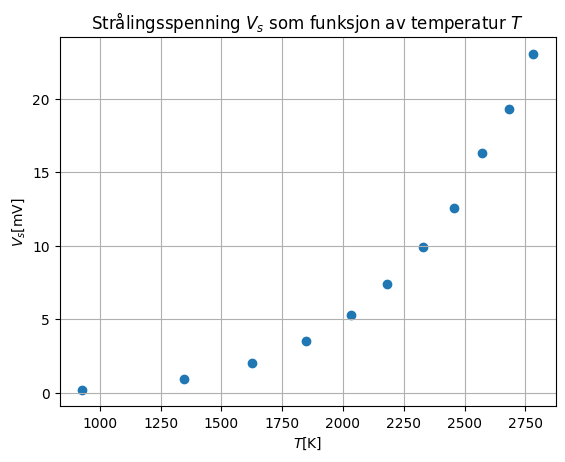

In [133]:
plt.scatter(Ttab,Vs)
#plt.scatter(Ttab[4],Vs[4],label='Uteligger')
#plt.legend()
plt.title(r"Strålingsspenning $V_s$ som funksjon av temperatur $T$")
plt.ylabel(r"$V_s[\text{mV}]$")
plt.xlabel(r"$T[\text{K}]$")
plt.grid()
plt.plot()



C:\Users\Oliver\AppData\Local\Temp\ipykernel_20076\780616359.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[]

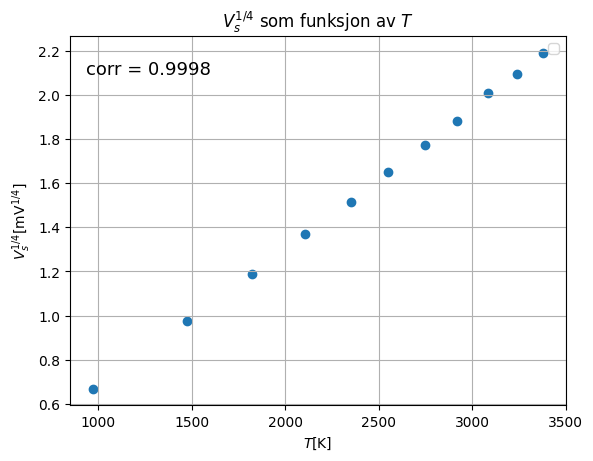

In [134]:
#plt.scatter(Ttab,np.log(Vs))
plt.scatter(Teq,Vs**(1/4))
#plt.scatter(Ttab[4],Vs[4],label='Uteligger')
plt.legend()
plt.title(r"$V_s^{1/4}$ som funksjon av $T$")
plt.ylabel(r"$V_s^{1/4}[\text{mV}^{1/4}]$")
plt.xlabel(r"$T[\text{K}]$")
plt.grid()
corr = np.corrcoef(Teq,Vs**(1/4))[0,1]
#plt.text(x=0,y=0,s=corr)
plt.figtext(0.15, 0.8, f'corr = {corr:.4f}', fontsize=13)
plt.plot()

In [135]:
Ttab

array([ 927.77811971, 1348.11867137, 1625.8440751 , 1847.40048447,
       2033.85170859, 2181.09966826, 2330.0405789 , 2455.56567525,
       2571.45238256, 2683.99261135, 2782.01621064])

In [136]:
RR0

array([ 4.02722403,  6.29465269,  7.85731123,  9.13492281, 10.23311025,
       11.12470798, 12.02625159, 12.80450719, 13.53729525, 14.24075419,
       14.87310537])

In [137]:
R

array([1.07526882, 1.68067227, 2.0979021 , 2.43902439, 2.73224044,
       2.97029703, 3.21100917, 3.41880342, 3.61445783, 3.80228137,
       3.97111913])

Vi forventer (forstatt) vs prop T^4
så plotter vs/T^4 mot T

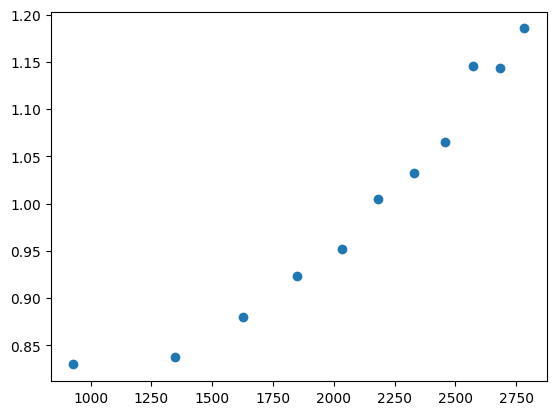

In [138]:
props = Vs/Ttab**4
props /= props.mean()
plt.scatter(Ttab, props)
plt.show()

In [139]:
R

array([1.07526882, 1.68067227, 2.0979021 , 2.43902439, 2.73224044,
       2.97029703, 3.21100917, 3.41880342, 3.61445783, 3.80228137,
       3.97111913])